___

#### Rick Fontenot, Joe Lazarus, Puri Rudick
####
___


## This first section is a copy of the tensorflow tutorial to confirm setup, reference:
https://www.tensorflow.org/tutorials/keras/classification

Load the Tensorflow Library

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape


(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)


60000

Each label is an integer between 0 and 9:

In [6]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

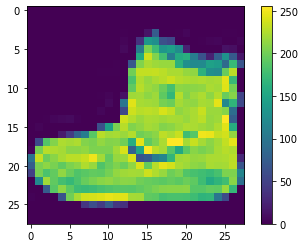

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

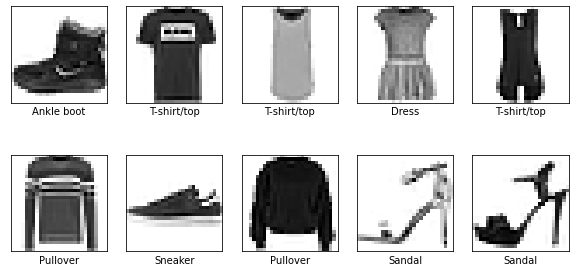

In [11]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Add Hierarchical class labels to the training and test sets 

In [12]:
import pandas as pd

train100_labels = pd.DataFrame(train_labels)
train100_labels = train100_labels.rename(columns={train100_labels.columns[0]: 'label'})

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
d = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

train100_labels['fine_label'] = replace_all(train100_labels['label'], d)

train100_labels.head(20)

,label,fine_label
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top
5,2,Pullover
6,7,Sneaker
7,2,Pullover
8,5,Sandal
9,5,Sandal


In [13]:
medium_dictionary = {'T-shirt/top': 'Tops', 'Trouser': 'Bottoms', 'Pullover': 'Tops', 'Dress': 'Dresses', 'Coat': 'Outers', 'Sandal': 'Shoes', 'Shirt': 'Tops', 'Sneaker': 'Shoes', 'Bag': 'Accessories', 'Ankle boot': 'Shoes'}
train100_labels['medium_label']= train100_labels['fine_label'].map(medium_dictionary)

coarse_dictionary = {'Tops': 'Clothes', 'Bottoms': 'Clothes', 'Dresses': 'Clothes', 'Outers': 'Clothes', 'Shoes': 'Goods', 'Accessories': 'Goods'}
train100_labels['coarse_label']= train100_labels['medium_label'].map(coarse_dictionary)

train100_images_flattened = pd.DataFrame(train_images.flatten().reshape(60000, 784))

train100 = pd.concat([train100_labels, train100_images_flattened], axis=1)

train100.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.003922,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
import pandas as pd

test_labels = pd.DataFrame(test_labels)
test_labels = test_labels.rename(columns={test_labels.columns[0]: 'label'})

test_labels['fine_label'] = replace_all(test_labels['label'], d)
test_labels['medium_label']= test_labels['fine_label'].map(medium_dictionary)
test_labels['coarse_label']= test_labels['medium_label'].map(coarse_dictionary)

test_images_flattened = pd.DataFrame(test_images.flatten().reshape(10000, 784))

test = pd.concat([test_labels, test_images_flattened], axis=1)

test.head(20)

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.007843,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.643137,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.278431,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.568627,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.141176,0.117647,0.105882,0.105882,0.000000,0.000000,0.0,0.0
7,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.039216,0.000000,0.000000,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## Stratified split of training set into 90% train, 10% validation
### Validation can be used for early stopping on models 3,4,5
### and for tuning on model 5
### Once stopping criteria and hyperparameters determined, re-fit with full training set before predictions

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, holdback_index in split.split(train100, train100.label):
    train90 = train100.iloc[train_index]
    validation10 = train100.iloc[holdback_index]


In [16]:
print("90% Training set \n",train90['fine_label'].value_counts())
print("10% Validation set \n",validation10['fine_label'].value_counts())



90% Training set 
 Bag            5400
Ankle boot     5400
T-shirt/top    5400
Trouser        5400
Coat           5400
Shirt          5400
Sandal         5400
Sneaker        5400
Dress          5400
Pullover       5400
Name: fine_label, dtype: int64
10% Validation set 
 Dress          600
Trouser        600
Ankle boot     600
Bag            600
Pullover       600
Coat           600
T-shirt/top    600
Shirt          600
Sandal         600
Sneaker        600
Name: fine_label, dtype: int64


In [17]:
train90_images_flattened = train90.iloc[:,4:788].values
validation10_images_flattened = validation10.iloc[:,4:788].values


# Model 1
## Base "Flat" model with no early stopping criteria

Use full training set since no stopping or tuning. Images are already flattened so just include single dense hidden layer plus output layer

In [18]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-04 21:44:57.106407: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-04 21:44:57.106777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Compile Model 1

Use Sparse Categorical Cross entropy loss function with accuracy as the metric

In [19]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model 1
Using full training set with pre-flattened images and 10 epochs

Note the labels are converted to an array instead of df column to speed up training time

In [20]:
from datetime import datetime

model1_start_time = datetime.now()
model1.fit(train100_images_flattened, np.asarray(train100.label), epochs=30)
model1_end_time = datetime.now()
model1_train_time = model1_end_time - model1_start_time
print("Model 1 Training Time = ",model1_train_time)


Epoch 1/30


2022-05-04 21:44:57.618586: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-04 21:44:58.131818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 4ms/step - loss: 0.4983 - accuracy: 0.8248
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3739 - accuracy: 0.8659
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3360 - accuracy: 0.8770
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3139 - accuracy: 0.8848
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2982 - accuracy: 0.8897
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2817 - accuracy: 0.8956
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2677 - accuracy: 0.9003
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2571 - accuracy: 0.9043
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2465 - accuracy: 0.9086
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2373 - accura

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [21]:
model1_probbabilities = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
model1_predictions = model1_probbabilities.predict(test_images_flattened)
model1_prediction_label = np.argmax(model1_predictions, axis=1)

2022-05-04 21:48:37.900177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [22]:
model1_prediction_label[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### Add Hierarchical labels to model 1 predictions

In [23]:
import pandas as pd

model1_prediction_labels = pd.DataFrame(model1_prediction_label)
model1_prediction_labels = model1_prediction_labels.rename(columns={model1_prediction_labels.columns[0]: 'label'})

model1_prediction_labels['fine_prediction'] = replace_all(model1_prediction_labels['label'], d)
model1_prediction_labels['medium_prediction']= model1_prediction_labels['fine_prediction'].map(medium_dictionary)
model1_prediction_labels['coarse_prediction']= model1_prediction_labels['medium_prediction'].map(coarse_dictionary)

model1_prediction_labels.head(10)

,label,fine_prediction,medium_prediction,coarse_prediction
0,9,Ankle boot,Shoes,Goods
1,2,Pullover,Tops,Clothes
2,1,Trouser,Bottoms,Clothes
3,1,Trouser,Bottoms,Clothes
4,6,Shirt,Tops,Clothes
5,1,Trouser,Bottoms,Clothes
6,4,Coat,Outers,Clothes
7,6,Shirt,Tops,Clothes
8,5,Sandal,Shoes,Goods
9,7,Sneaker,Shoes,Goods


## Model 1 : Overall Classification Report & Accuracy:

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model1_fine_accuracy = accuracy_score(test_labels.fine_label, model1_prediction_labels.fine_prediction)
model1_medium_accuracy = accuracy_score(test_labels.medium_label, model1_prediction_labels.medium_prediction)
model1_coarse_accuracy = accuracy_score(test_labels.coarse_label, model1_prediction_labels.coarse_prediction)

print("Fine Level Accuracy = ",model1_fine_accuracy)
print("Medium Level Accuracy = ",model1_medium_accuracy)
print("Coarse Level Accuracy = ",model1_coarse_accuracy)
print("\n")
print("Fine Level Classification Report \n",classification_report(test_labels.fine_label,model1_prediction_labels.fine_prediction, 
                            target_names=class_names))

Fine Level Accuracy =  0.8877
Medium Level Accuracy =  0.9401
Coarse Level Accuracy =  0.9939


Fine Level Classification Report 
               precision    recall  f1-score   support

 T-shirt/top       0.97      0.95      0.96      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.79      0.85      0.82      1000
       Dress       0.92      0.86      0.89      1000
        Coat       0.79      0.82      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.76      0.64      0.69      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.77      0.90      0.83      1000
  Ankle boot       0.99      0.97      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Model 2 : First Hierarchical model
## All models to use matching single dense layer as model 1, no early stopping, full training set



Based on Hierarchical Structure of this dataset there will be 5 models:

A) model2_coarse : will predict either "Clothes" or "Goods"
B) model2_clothes : will predict "Tops" , "Bottoms", "Dresses", "Outers" --> note only Tops needs further modeling
C) model2_goods : will predict "Accessories" or "Shoes
D) model2_tops : will predict "T-shirt/Top", "Pullover", "Shirt"
E) model2_shoes : will predict "Sandal", "Sneaker", "Ankle Boot"

For the medium level labels:
4 labels come from model2_clothes
2 labels come from model2_goods
Total 6 labels

For the fine level labels:
If model2_clothes = Bottoms then model2.fine_label = Trouser
If model2_clothes = Dresses then model2.fine_label = Dress
If model2_clothes = Outers then model2.fine_label = Coat
If model2_goods = Accessories then model2.fine_label = Bag
3 labels come from model2_tops
3 labels come from model2_shoes
Total 10 labels

Based on framework described above, the following training subsets need to be created:

train100_clothes --> subset train100.coarse_label == "Clothes" should have 36,000 rows
train100_goods --> subset train100.coarse_label == "Goods" should have 24,000 rows
train100_tops --> subset train100.medium_label == "Tops" should have 18,000 rows
train100_shoes --> subset train100.medium_label == "Shoes" should have 18,000 rows

** Note the 1st coarse model just uses the full training set, no subset needed

In [25]:
train100_clothes = train100[train100.coarse_label == "Clothes"]
print("Clothes # Rows = ",train100_clothes.shape[0])
train100_goods = train100[train100.coarse_label == "Goods"]
print("Goods # Rows = ",train100_goods.shape[0])
train100_tops = train100[train100.medium_label == "Tops"]
print("Tops # Rows = ",train100_tops.shape[0])
train100_shoes = train100[train100.medium_label == "Shoes"]
print("Shoes # Rows = ",train100_shoes.shape[0])

Clothes # Rows =  36000
Goods # Rows =  24000
Tops # Rows =  18000
Shoes # Rows =  18000


Create "X" with just the flattened image columns for each training set

In [26]:
train100_clothes_flattened = train100_clothes.iloc[:,4:788].values
train100_goods_flattened = train100_goods.iloc[:,4:788].values
train100_tops_flattened = train100_tops.iloc[:,4:788].values
train100_shoes_flattened = train100_shoes.iloc[:,4:788].values



### Setup Model 2 matching format of Model 1
### Model 2 Coarse level predictions

In [27]:
model2_coarse = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model2_coarse.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
coarse_ints = {'Clothes': 0, 'Goods': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_course_labels = np.asarray(train100['coarse_label'].map(coarse_ints))

In [29]:
from datetime import datetime

model2_coarse_start_time = datetime.now()
model2_coarse.fit(train100_images_flattened, model2_course_labels, epochs=30)
model2_coarse__end_time = datetime.now()
model2_coarse__train_time = model2_coarse__end_time - model2_coarse_start_time
print("Model-2-Coarse Training Time = ",model2_coarse__train_time)

Epoch 1/30


2022-05-04 21:48:39.614825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0377 - accuracy: 0.9897
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9932
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9947
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0145 - accuracy: 0.9958
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0123 - accuracy: 0.9963
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0097 - accuracy: 0.9970
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0063 - accurac

### Model 2 Clothes level predictions

In [30]:
train100_clothes['medium_label'].value_counts()

Tops       18000
Dresses     6000
Bottoms     6000
Outers      6000
Name: medium_label, dtype: int64

In [31]:
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_clothes_labels = np.asarray(train100_clothes['medium_label'].map(clothes_ints))

In [32]:
model2_clothes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

model2_clothes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
from datetime import datetime

model2_clothes_start_time = datetime.now()
model2_clothes.fit(train100_clothes_flattened, model2_clothes_labels, epochs=30)
model2_clothes_end_time = datetime.now()
model2_clothes_train_time = model2_clothes_end_time - model2_clothes_start_time
print("Model-2-Clothes Training Time = ",model2_clothes_train_time)

Epoch 1/30
   1/1125 [..............................] - ETA: 6:25 - loss: 1.3092 - accuracy: 0.5000

2022-05-04 21:52:05.760414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1125/1125 [==============================] - 4s 4ms/step - loss: 0.3707 - accuracy: 0.8543
Epoch 2/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2867 - accuracy: 0.8898
Epoch 3/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.2596 - accuracy: 0.9004
Epoch 4/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2436 - accuracy: 0.9067
Epoch 5/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2320 - accuracy: 0.9121
Epoch 6/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2222 - accuracy: 0.9168
Epoch 7/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2124 - accuracy: 0.9174
Epoch 8/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2066 - accuracy: 0.9204
Epoch 9/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1967 - accuracy: 0.9237
Epoch 10/30
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1909 - accurac

### Model 2 Goods level predictions

In [34]:
train100_goods['medium_label'].value_counts()

Shoes          18000
Accessories     6000
Name: medium_label, dtype: int64

In [35]:
goods_ints = {'Shoes': 0, 'Accessories': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_goods_labels = np.asarray(train100_goods['medium_label'].map(goods_ints))

In [36]:
model2_goods = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model2_goods.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
from datetime import datetime

model2_goods_start_time = datetime.now()
model2_goods.fit(train100_goods_flattened, model2_goods_labels, epochs=30)
model2_goods_end_time = datetime.now()
model2_goods_train_time = model2_goods_end_time - model2_goods_start_time
print("Model-2-Goods Training Time = ",model2_goods_train_time)

Epoch 1/30
 29/750 [>.............................] - ETA: 2s - loss: 0.2039 - accuracy: 0.9289

2022-05-04 21:54:07.463370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 3s 3ms/step - loss: 0.0277 - accuracy: 0.9919
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0105 - accuracy: 0.9969
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0058 - accuracy: 0.9983
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9985
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9987
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0029 - accuracy: 0.9990
Epoch 8/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 9/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 10/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 11/3

### Model 2 Tops level predictions

In [38]:
train100_tops['fine_label'].value_counts()

T-shirt/top    6000
Pullover       6000
Shirt          6000
Name: fine_label, dtype: int64

In [39]:
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_tops_labels = np.asarray(train100_tops['fine_label'].map(tops_ints))

In [40]:
model2_tops = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model2_tops.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
from datetime import datetime

model2_tops_start_time = datetime.now()
model2_tops.fit(train100_tops_flattened, model2_tops_labels, epochs=30)
model2_tops_end_time = datetime.now()
model2_tops_train_time = model2_tops_end_time - model2_tops_start_time
print("Model-2-Tops Training Time = ",model2_tops_train_time)

Epoch 1/30


2022-05-04 21:55:28.168590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


563/563 [==============================] - 3s 5ms/step - loss: 0.5251 - accuracy: 0.7828
Epoch 2/30
563/563 [==============================] - 2s 4ms/step - loss: 0.4327 - accuracy: 0.8178
Epoch 3/30
563/563 [==============================] - 2s 4ms/step - loss: 0.4041 - accuracy: 0.8304
Epoch 4/30
563/563 [==============================] - 2s 4ms/step - loss: 0.3820 - accuracy: 0.8391
Epoch 5/30
563/563 [==============================] - 2s 4ms/step - loss: 0.3668 - accuracy: 0.8473
Epoch 6/30
563/563 [==============================] - 2s 4ms/step - loss: 0.3589 - accuracy: 0.8476
Epoch 7/30
563/563 [==============================] - 2s 4ms/step - loss: 0.3471 - accuracy: 0.8531
Epoch 8/30
563/563 [==============================] - 2s 4ms/step - loss: 0.3347 - accuracy: 0.8602
Epoch 9/30
563/563 [==============================] - 2s 4ms/step - loss: 0.3286 - accuracy: 0.8631
Epoch 10/30
563/563 [==============================] - 2s 4ms/step - loss: 0.3209 - accuracy: 0.8669
Epoch 11/3

### Model 2 Shoes level predictions

In [42]:
train100_shoes['fine_label'].value_counts()

Ankle boot    6000
Sneaker       6000
Sandal        6000
Name: fine_label, dtype: int64

In [43]:
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_shoes_labels = np.asarray(train100_shoes['fine_label'].map(shoes_ints))

In [44]:
model2_shoes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model2_shoes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
from datetime import datetime

model2_shoes_start_time = datetime.now()
model2_shoes.fit(train100_shoes_flattened, model2_shoes_labels, epochs=30)
model2_shoes_end_time = datetime.now()
model2_shoes_train_time = model2_shoes_end_time - model2_shoes_start_time
print("Model-2-Shoes Training Time = ",model2_shoes_train_time)

Epoch 1/30
 25/563 [>.............................] - ETA: 2s - loss: 0.6682 - accuracy: 0.7050

2022-05-04 21:56:38.604936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


563/563 [==============================] - 2s 4ms/step - loss: 0.2473 - accuracy: 0.9122
Epoch 2/30
563/563 [==============================] - 2s 4ms/step - loss: 0.1539 - accuracy: 0.9468
Epoch 3/30
563/563 [==============================] - 2s 4ms/step - loss: 0.1306 - accuracy: 0.9537
Epoch 4/30
563/563 [==============================] - 2s 4ms/step - loss: 0.1143 - accuracy: 0.9601
Epoch 5/30
563/563 [==============================] - 2s 4ms/step - loss: 0.1019 - accuracy: 0.9641
Epoch 6/30
563/563 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9652
Epoch 7/30
563/563 [==============================] - 2s 4ms/step - loss: 0.0851 - accuracy: 0.9690
Epoch 8/30
563/563 [==============================] - 2s 4ms/step - loss: 0.0790 - accuracy: 0.9705
Epoch 9/30
563/563 [==============================] - 2s 4ms/step - loss: 0.0724 - accuracy: 0.9732
Epoch 10/30
563/563 [==============================] - 2s 4ms/step - loss: 0.0693 - accuracy: 0.9749
Epoch 11/3

## Make Predictions using pipeline of Model 2 subnetworks

**To recap the model output dictionaries are:** <br>
coarse_ints = {'Clothes': 0, 'Goods': 1} <br>
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3} <br>
goods_ints = {'Shoes': 0, 'Accessories': 1} <br>
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2} <br>
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2} <br>

del test
del test_clothes
del test_clothes_flattened
del test_clothes_other
del test_goods
del test_goods_flattened
del test_tops
del test_tops_flattened

### Coarse Model Predictions
coarse_ints = {'Clothes': 0, 'Goods': 1} <br>


In [46]:
model2_coarse_probbability_model = tf.keras.Sequential([model2_coarse, tf.keras.layers.Softmax()])
model2_coarse_predictions = model2_coarse_probbability_model.predict(test_images_flattened)
model2_coarse_prediction_label = np.argmax(model2_coarse_predictions, axis=1)


2022-05-04 21:57:48.137628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [47]:
model2_coarse_prediction_label[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

### Add labels mapped to predictions

In [48]:
import pandas as pd

model2_coarse_prediction_labels = pd.DataFrame(model2_coarse_prediction_label)
model2_coarse_prediction_labels = model2_coarse_prediction_labels.rename(columns={model2_coarse_prediction_labels.columns[0]: 'coarse_prediction'})

coarse_mapping = {0: 'Clothes', 1: 'Goods'}
model2_coarse_prediction_labels['coarse_prediction']= model2_coarse_prediction_labels['coarse_prediction'].map(coarse_mapping)

model2_coarse_prediction_labels.head(10)

,coarse_prediction
0,Goods
1,Clothes
2,Clothes
3,Clothes
4,Clothes
5,Clothes
6,Clothes
7,Clothes
8,Goods
9,Goods


### Merge Coarse predictions back to test dataframe

In [49]:
test = pd.concat([test, model2_coarse_prediction_labels], axis=1)
test.head()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [50]:
print(test['coarse_prediction'].value_counts())
print("Total = ", test.shape[0])

Clothes    6048
Goods      3952
Name: coarse_prediction, dtype: int64
Total =  10000


### Split test set into Clothes vs. Goods to feed into next level of model predictions

In [51]:
test_clothes = test[test.coarse_prediction == "Clothes"]
test_clothes_flattened = test_clothes.iloc[:,4:788].values
test_clothes.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,coarse_prediction
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [52]:
print(test_clothes['coarse_prediction'].value_counts())
print("Total = ", test_clothes.shape[0])

Clothes    6048
Name: coarse_prediction, dtype: int64
Total =  6048


In [53]:
test_goods = test[test.coarse_prediction == "Goods"]
test_goods_flattened = test_goods.iloc[:,4:788].values
test_goods.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods


In [54]:
print(test_goods['coarse_prediction'].value_counts())
print("Total = ", test_goods.shape[0])

Goods    3952
Name: coarse_prediction, dtype: int64
Total =  3952


### Make predictions with Clothes sub-model

In [55]:
model2_clothes_probbability_model = tf.keras.Sequential([model2_clothes, tf.keras.layers.Softmax()])
model2_clothes_predictions = model2_clothes_probbability_model.predict(test_clothes_flattened)
model2_clothes_prediction_label = np.argmax(model2_clothes_predictions, axis=1)

2022-05-04 21:57:49.053080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [56]:
model2_clothes_prediction_label[0:10]

array([0, 2, 2, 0, 2, 3, 0, 3, 1, 3])

In [57]:
model2_clothes_prediction_label.shape

(6048,)

clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3} <br>

In [58]:
import pandas as pd

model2_clothes_prediction_labels = pd.DataFrame(model2_clothes_prediction_label)
model2_clothes_prediction_labels = model2_clothes_prediction_labels.rename(columns={model2_clothes_prediction_labels.columns[0]: 'medium_prediction'})

clothes_mapping = {0: 'Tops', 1: 'Dresses', 2: 'Bottoms', 3: 'Outers'}
model2_clothes_prediction_labels['medium_prediction']= model2_clothes_prediction_labels['medium_prediction'].map(clothes_mapping)

model2_clothes_prediction_labels.head(10)

,medium_prediction
0,Tops
1,Bottoms
2,Bottoms
3,Tops
4,Bottoms
5,Outers
6,Tops
7,Outers
8,Dresses
9,Outers


In [59]:
model2_clothes_prediction_labels.shape

(6048, 1)

In [60]:
test_clothes.shape

(6048, 789)

### Merge Clothes predictions back to test_clothes dataframe

In [61]:
test_clothes.reset_index(drop=True, inplace=True)
model2_clothes_prediction_labels.reset_index(drop=True, inplace=True)
test_clothes = pd.concat([test_clothes, model2_clothes_prediction_labels], axis=1)
test_clothes.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,coarse_prediction,medium_prediction
6043,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.52549,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops
6044,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops
6045,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6046,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6047,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms


In [62]:
print(test_clothes['medium_prediction'].value_counts())
print("Total = ", test_clothes.shape[0])


Tops       2932
Outers     1145
Bottoms     993
Dresses     978
Name: medium_prediction, dtype: int64
Total =  6048


## Split Test Clothes into Tops for further modeling vs. others that just need fine label added

In [63]:
test_clothes_other = test_clothes[test_clothes.medium_prediction != "Tops"]
test_clothes_other.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,coarse_prediction,medium_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.141176,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers


### The others, have completed predictions, add fine labels to dataframe
Recap from Above:
If model2_clothes = Bottoms then model2.fine_label = Trouser
If model2_clothes = Dresses then model2.fine_label = Dress
If model2_clothes = Outers then model2.fine_label = Coat

In [64]:
test_clothes_other['fine_prediction'] = ''
test_clothes_other.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_26193/3136292445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other['fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,coarse_prediction,medium_prediction,fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,


In [65]:
clothes_other_mapping = {'Bottoms': 'Trouser', 'Dresses': 'Dress', 'Outers': 'Coat'}
test_clothes_other['fine_prediction']= test_clothes_other['medium_prediction'].map(clothes_other_mapping)
test_clothes_other

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_26193/1840138925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other['fine_prediction']= test_clothes_other['medium_prediction'].map(clothes_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,coarse_prediction,medium_prediction,fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,Coat
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,Coat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6041,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Dresses,Dress
6045,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6046,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser


In [66]:
test_clothes_other.shape

(3116, 791)

### Split test tops for next layer of modeling

In [67]:
test_tops = test_clothes[test_clothes.medium_prediction == "Tops"]
test_tops_flattened = test_tops.iloc[:,4:788].values
test_tops.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,coarse_prediction,medium_prediction
0,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0,Clothes,Tops
3,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops
6,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0,Clothes,Tops
11,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.058824,0.478431,0.443137,0.317647,0.0,0.0,Clothes,Tops
12,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops


## Make predictions with the Tops sub-model

In [68]:
model2_tops_probbability_model = tf.keras.Sequential([model2_tops, tf.keras.layers.Softmax()])
model2_tops_predictions = model2_tops_probbability_model.predict(test_tops_flattened)
model2_tops_prediction_label = np.argmax(model2_tops_predictions, axis=1)

2022-05-04 21:57:50.350564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [69]:
model2_tops_prediction_label[0:10]

array([1, 2, 2, 1, 1, 0, 1, 1, 0, 2])

In [70]:
model2_tops_prediction_label.shape

(2932,)

tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2} <br>


In [71]:
import pandas as pd

model2_tops_prediction_labels = pd.DataFrame(model2_tops_prediction_label)
model2_tops_prediction_labels = model2_tops_prediction_labels.rename(columns={model2_tops_prediction_labels.columns[0]: 'fine_prediction'})

tops_mapping = {0: 'T-shirt/top', 1: 'Pullover', 2: 'Shirt'}
model2_tops_prediction_labels['fine_prediction']= model2_tops_prediction_labels['fine_prediction'].map(tops_mapping)

model2_tops_prediction_labels.head(10)

,fine_prediction
0,Pullover
1,Shirt
2,Shirt
3,Pullover
4,Pullover
5,T-shirt/top
6,Pullover
7,Pullover
8,T-shirt/top
9,Shirt


In [72]:
test_tops.shape

(2932, 790)

In [73]:
model2_tops_prediction_labels.shape

(2932, 1)

merge predictions

In [74]:
test_tops.reset_index(drop=True, inplace=True)
model2_tops_prediction_labels.reset_index(drop=True, inplace=True)
test_tops = pd.concat([test_tops, model2_tops_prediction_labels], axis=1)
test_tops.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,coarse_prediction,medium_prediction,fine_prediction
2927,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.011765,...,0.000000,0.000000,0.011765,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
2928,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.317647,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
2929,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
2930,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.525490,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
2931,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,Shirt


In [75]:
test_tops.shape

(2932, 791)

### The Clothes branch of the network is now complete
### Start the Goods branch of the network

In [76]:
test_goods.head()
#test_goods_flattened


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods


In [77]:
model2_goods_probbability_model = tf.keras.Sequential([model2_goods, tf.keras.layers.Softmax()])
model2_goods_predictions = model2_goods_probbability_model.predict(test_goods_flattened)
model2_goods_prediction_label = np.argmax(model2_goods_predictions, axis=1)

2022-05-04 21:57:51.048459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [78]:
model2_goods_prediction_label[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [79]:
model2_goods_prediction_label.shape

(3952,)

goods_ints = {'Shoes': 0, 'Accessories': 1} <br>

In [80]:
import pandas as pd

model2_goods_prediction_labels = pd.DataFrame(model2_goods_prediction_label)
model2_goods_prediction_labels = model2_goods_prediction_labels.rename(columns={model2_goods_prediction_labels.columns[0]: 'medium_prediction'})

goods_mapping = {0: 'Shoes', 1: 'Accessories'}
model2_goods_prediction_labels['medium_prediction']= model2_goods_prediction_labels['medium_prediction'].map(goods_mapping)

model2_goods_prediction_labels.head(10)


,medium_prediction
0,Shoes
1,Shoes
2,Shoes
3,Shoes
4,Shoes
5,Accessories
6,Shoes
7,Shoes
8,Shoes
9,Shoes


In [81]:
model2_goods_prediction_labels.shape

(3952, 1)

In [82]:
test_goods.shape

(3952, 789)

In [83]:
test_goods.reset_index(drop=True, inplace=True)
model2_goods_prediction_labels.reset_index(drop=True, inplace=True)
test_goods = pd.concat([test_goods, model2_goods_prediction_labels], axis=1)
test_goods.tail()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,coarse_prediction,medium_prediction
3947,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3948,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3949,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3950,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3951,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


In [84]:
print(test_goods['medium_prediction'].value_counts())
print("Total = ", test_goods.shape[0])


Shoes          3003
Accessories     949
Name: medium_prediction, dtype: int64
Total =  3952


## Split Test Goods into Shoes for further modeling vs. Accessories that just need fine label added

In [85]:
test_goods_other = test_goods[test_goods.medium_prediction != "Shoes"]
test_goods_other.head()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,coarse_prediction,medium_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.721569,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories


In [86]:
test_goods_other['fine_prediction'] = ''
test_goods_other.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_26193/3127364819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other['fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,coarse_prediction,medium_prediction,fine_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories,
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories,


In [87]:
goods_other_mapping = {'Accessories': 'Bag'}
test_goods_other['fine_prediction']= test_goods_other['medium_prediction'].map(goods_other_mapping)
test_goods_other.head()


/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_26193/2841895067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other['fine_prediction']= test_goods_other['medium_prediction'].map(goods_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,coarse_prediction,medium_prediction,fine_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories,Bag


## Make predictions with Shoes model

In [88]:
test_shoes = test_goods[test_goods.medium_prediction == "Shoes"]
test_shoes_flattened = test_shoes.iloc[:,4:788].values
test_shoes.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,coarse_prediction,medium_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
1,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
2,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
4,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


In [89]:
model2_shoes_probbability_model = tf.keras.Sequential([model2_shoes, tf.keras.layers.Softmax()])
model2_shoes_predictions = model2_shoes_probbability_model.predict(test_shoes_flattened)
model2_shoes_prediction_label = np.argmax(model2_shoes_predictions, axis=1)


2022-05-04 21:57:51.804816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [90]:
model2_shoes_prediction_label[0:10]

array([0, 2, 1, 2, 2, 2, 1, 2, 0, 1])

In [91]:
model2_shoes_prediction_label.shape

(3003,)

shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2} <br>

In [92]:
import pandas as pd

model2_shoes_prediction_labels = pd.DataFrame(model2_shoes_prediction_label)
model2_shoes_prediction_labels = model2_shoes_prediction_labels.rename(columns={model2_shoes_prediction_labels.columns[0]: 'fine_prediction'})

shoes_mapping = {0: 'Ankle boot', 1: 'Sneaker', 2: 'Sandal'}
model2_shoes_prediction_labels['fine_prediction']= model2_shoes_prediction_labels['fine_prediction'].map(shoes_mapping)

model2_shoes_prediction_labels.head(10)


,fine_prediction
0,Ankle boot
1,Sandal
2,Sneaker
3,Sandal
4,Sandal
5,Sandal
6,Sneaker
7,Sandal
8,Ankle boot
9,Sneaker


In [93]:
test_shoes.shape

(3003, 790)

In [94]:
model2_shoes_prediction_labels.shape

(3003, 1)

In [95]:
test_shoes.reset_index(drop=True, inplace=True)
model2_shoes_prediction_labels.reset_index(drop=True, inplace=True)
test_shoes = pd.concat([test_shoes, model2_shoes_prediction_labels], axis=1)
test_shoes.tail()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,coarse_prediction,medium_prediction,fine_prediction
2998,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
2999,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3000,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3001,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal


In [96]:
test_shoes.shape

(3003, 791)

Completed Prediction dataframes to be merged for completed tables <br>
test_clothes_other <br>
test_tops <br>
test_goods_other <br>
test_shoes


In [97]:
model2_all_predictions = pd.concat([test_clothes_other, test_tops, test_goods_other, test_shoes])
model2_all_predictions.shape


(10000, 791)

In [98]:
model2_all_predictions.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,coarse_prediction,medium_prediction,fine_prediction
2998,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
2999,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3000,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3001,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal


Check Accuracy on Test Predictions

In [99]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model2_fine_accuracy = accuracy_score(model2_all_predictions.fine_label, model2_all_predictions.fine_prediction)
model2_medium_accuracy = accuracy_score(model2_all_predictions.medium_label, model2_all_predictions.medium_prediction)
model2_coarse_accuracy = accuracy_score(model2_all_predictions.coarse_label, model2_all_predictions.coarse_prediction)

print("Fine Level Accuracy = ",model2_fine_accuracy)
print("Medium Level Accuracy = ",model2_medium_accuracy)
print("Coarse Level Accuracy = ",model2_coarse_accuracy)
print("\n")
print("Fine Level Classification Report \n",classification_report(model2_all_predictions.fine_label,model2_all_predictions.fine_prediction))
print("\n")
print("Medium Level Classification Report \n",classification_report(model2_all_predictions.medium_label,model2_all_predictions.medium_prediction))
print("\n")
print("Coarse Level Classification Report \n",classification_report(model2_all_predictions.coarse_label,model2_all_predictions.coarse_prediction))

Fine Level Accuracy =  0.8886
Medium Level Accuracy =  0.9369
Coarse Level Accuracy =  0.9934


Fine Level Classification Report 
               precision    recall  f1-score   support

  Ankle boot       0.96      0.97      0.97      1000
         Bag       0.99      0.94      0.96      1000
        Coat       0.75      0.86      0.80      1000
       Dress       0.91      0.89      0.90      1000
    Pullover       0.81      0.79      0.80      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.71      0.71      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.98      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Medium Level Classification Report 
               precision    recall  f1-score   support

 Accessories    

Compared to Model 1 results below

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model1_fine_accuracy = accuracy_score(test_labels.fine_label, model1_prediction_labels.fine_prediction)
model1_medium_accuracy = accuracy_score(test_labels.medium_label, model1_prediction_labels.medium_prediction)
model1_coarse_accuracy = accuracy_score(test_labels.coarse_label, model1_prediction_labels.coarse_prediction)

print("Fine Level Accuracy = ",model1_fine_accuracy)
print("Medium Level Accuracy = ",model1_medium_accuracy)
print("Coarse Level Accuracy = ",model1_coarse_accuracy)
print("\n")
print("Fine Level Classification Report \n",classification_report(test_labels.fine_label,model1_prediction_labels.fine_prediction))
print("\n")
print("Medium Level Classification Report \n",classification_report(test_labels.medium_label,model1_prediction_labels.medium_prediction))
print("\n")
print("Coarse Level Classification Report \n",classification_report(test_labels.coarse_label,model1_prediction_labels.coarse_prediction))


Fine Level Accuracy =  0.8877
Medium Level Accuracy =  0.9401
Coarse Level Accuracy =  0.9939


Fine Level Classification Report 
               precision    recall  f1-score   support

  Ankle boot       0.97      0.95      0.96      1000
         Bag       0.99      0.95      0.97      1000
        Coat       0.79      0.85      0.82      1000
       Dress       0.92      0.86      0.89      1000
    Pullover       0.79      0.82      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.76      0.64      0.69      1000
     Sneaker       0.94      0.97      0.95      1000
 T-shirt/top       0.77      0.90      0.83      1000
     Trouser       0.99      0.97      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Medium Level Classification Report 
               precision    recall  f1-score   support

 Accessories    